In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import mode
%matplotlib inline

In [76]:
pd.set_option('display.max_columns', 500)

df = pd.read_csv('final_dataset_no_dummies.csv')
df['majority_album_type'] = [str(i).strip(' ') for i in df['majority_album_type']]

df.head()

,Unnamed: 0,followers,name,owner,track_ids,num_tracks,avg_song_popularity,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_duration_ms,avg_num_artists,avg_num_markets,majority_explicit,majority_mode,majority_key,majority_time_signature,majority_album_type,avg_album_popularity,avg_album_release_year,avg_artist_popularity,avg_artist_followers,majority_artist_genres
0,0,18129916,Today's Top Hits,spotify,"['0tBbt8CrmxbjRP0pueQkyU', ' 2amzBJRBPOGszBem4...",50,84.277778,0.624333,0.660000,-5.696467,0.085307,0.170962,0.000021,0.154687,0.326580,202240.933333,1.833333,38.500000,0.0,0.0,11.0,4.0,single,81.444444,2017.000000,91.160000,2545532.960,pop
1,1,8323892,RapCaviar,spotify,"['4dVpf9jZjcORqGTLUaeYj9', ' 3ncgNpxLoBQ65ABk4...",51,76.900000,0.667125,0.697000,-6.476875,0.295200,0.164925,0.000018,0.289250,0.358250,183295.125000,1.800000,38.200000,1.0,1.0,5.0,4.0,album,77.800000,2017.000000,87.538462,1250737.000,rap
2,2,4600937,mint,spotify,"['3VQDpxMffTaggOHEeur7Tj', ' 43V1z6QToNNWNldV4...",52,52.800000,0.718800,0.693400,-6.560600,0.064060,0.143030,0.032978,0.100100,0.453000,235286.200000,2.000000,38.000000,0.0,0.0,6.0,4.0,single,49.000000,2016.800000,72.500000,146571.500,tropical house
3,3,3787551,Are & Be,spotify,"['6gU9OKjOE7ghfEd55oRO57', ' 25wStx3LyTjYmHTd3...",51,62.090909,0.643800,0.454000,-8.381700,0.118980,0.299180,0.078657,0.111130,0.306480,235682.800000,1.090909,34.818182,0.0,1.0,2.0,4.0,single,59.727273,2016.818182,75.200000,1603454.800,indie r&b
4,4,3996091,Rock This,spotify,"['3k7JQg9M5rZJHveFYq0y9J', ' 5UMD1Iz7yyVK8Q5FL...",50,63.750000,0.559000,0.846875,-4.375125,0.090525,0.002983,0.032999,0.189312,0.553625,202412.625000,1.000000,46.750000,0.0,1.0,0.0,4.0,single,61.250000,2017.000000,77.000000,1265657.875,modern rock


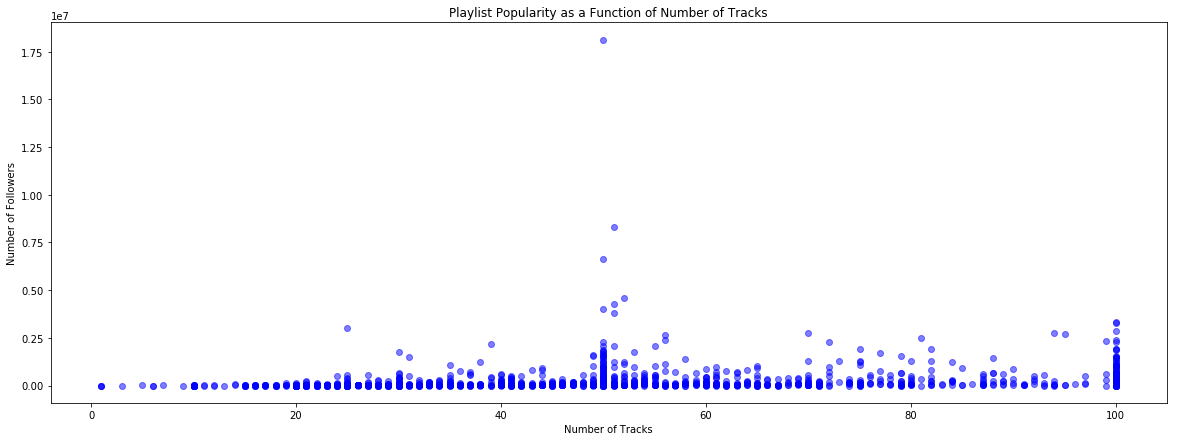

In [77]:
plt.figure(figsize=(20,7))
plt.scatter(df['num_tracks'], df['followers'], color='b', alpha=0.5)
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Number of Tracks')

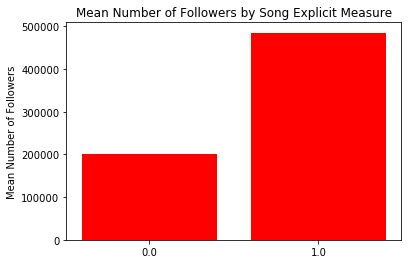

In [78]:
by_explicit = df.groupby('majority_explicit')
explicit_means = by_explicit['followers'].mean()
plt.bar(range(len(explicit_means)),explicit_means,tick_label=list(explicit_means.index), color='r')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Explicit Measure')
plt.show()

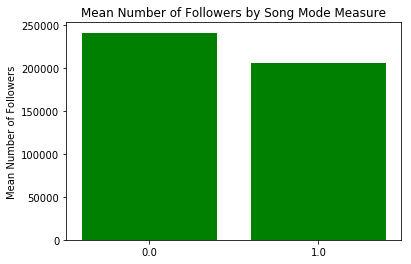

In [79]:
by_mode = df.groupby('majority_mode')
mode_means = by_mode['followers'].mean()
plt.bar(range(len(mode_means)),mode_means,tick_label=list(mode_means.index), color='g')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Song Mode Measure')
plt.show()

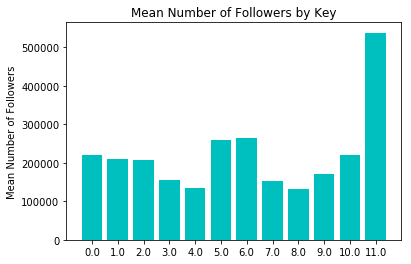

In [80]:
by_key = df.groupby('majority_key')
key_means = by_key['followers'].mean()
plt.bar(range(len(key_means)),key_means,tick_label=list(key_means.index), color='c')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Key')
plt.show()

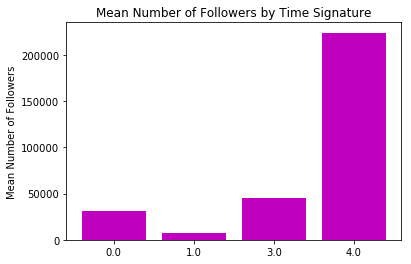

In [81]:
by_time_sig = df.groupby('majority_time_signature')
time_sig_means = by_time_sig['followers'].mean()
plt.bar(range(len(time_sig_means)),time_sig_means,tick_label=list(time_sig_means.index), color='m')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Time Signature')
plt.show()

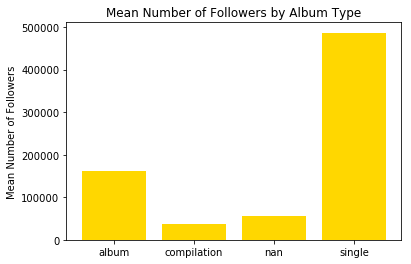

In [82]:
by_album_type = df.groupby('majority_album_type')
album_type_means = by_album_type['followers'].mean()
plt.bar(range(len(album_type_means)),album_type_means,tick_label=list(album_type_means.index), color='gold')
plt.ylabel('Mean Number of Followers')
plt.title('Mean Number of Followers by Album Type')
plt.show()

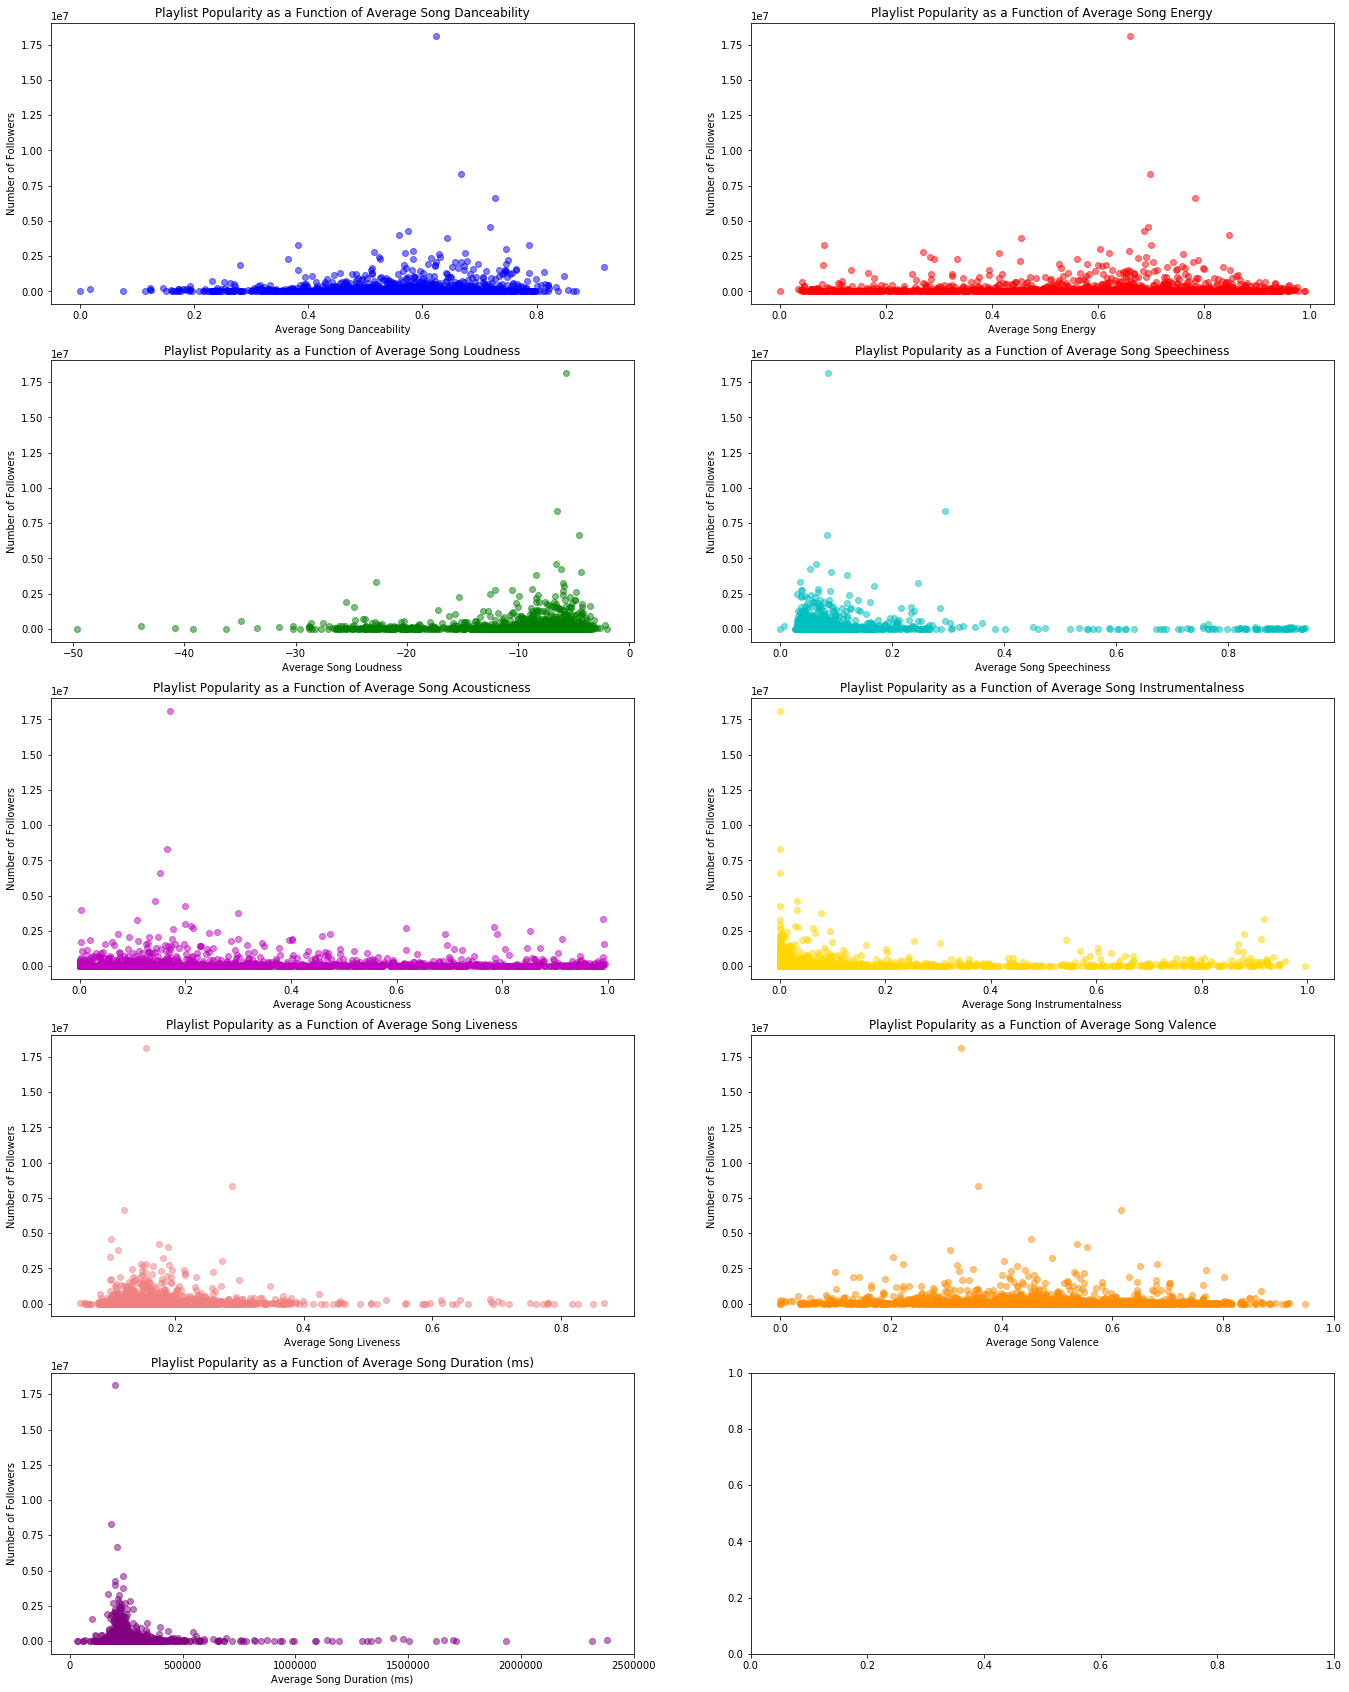

In [83]:
fig, ax = plt.subplots(5, 2, figsize=(23, 30))

plt.subplot(5, 2, 1)
plt.scatter(df['avg_danceability'], df['followers'], color='b', alpha=0.5)
plt.xlabel('Average Song Danceability')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Danceability')

plt.subplot(5, 2, 2)
plt.scatter(df['avg_energy'], df['followers'], color='r', alpha=0.5)
plt.xlabel('Average Song Energy')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Energy')

plt.subplot(5, 2, 3)
plt.scatter(df['avg_loudness'], df['followers'], color='g', alpha=0.5)
plt.xlabel('Average Song Loudness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Loudness')

plt.subplot(5, 2, 4)
plt.scatter(df['avg_speechiness'], df['followers'], color='c', alpha=0.5)
plt.xlabel('Average Song Speechiness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Speechiness')

plt.subplot(5, 2, 5)
plt.scatter(df['avg_acousticness'], df['followers'], color='m', alpha=0.5)
plt.xlabel('Average Song Acousticness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Acousticness')

plt.subplot(5, 2, 6)
plt.scatter(df['avg_instrumentalness'], df['followers'], color='gold', alpha=0.5)
plt.xlabel('Average Song Instrumentalness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Instrumentalness')

plt.subplot(5, 2, 7)
plt.scatter(df['avg_liveness'], df['followers'], color='lightcoral', alpha=0.5)
plt.xlabel('Average Song Liveness')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Liveness')

plt.subplot(5, 2, 8)
plt.scatter(df['avg_valence'], df['followers'], color='darkorange', alpha=0.5)
plt.xlabel('Average Song Valence')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Valence')

plt.subplot(5, 2, 9)
plt.scatter(df['avg_duration_ms'], df['followers'], color='purple', alpha=0.5)
plt.xlabel('Average Song Duration (ms)')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Average Song Duration (ms)')

plt.show()